## Problem 1: Galaxy Spectra (6 points)

The attached file `Problem_Set_6_Spectra.csv` contains the spectra of $4000$ galaxies in the Sloan Digital Sky Survey (SDSS). The spectra cover a logarithmically-spaced wavelength range of $316 \mathrm{nm}$ to $794 \mathrm{nm}$. You can ignore units on the fluxes since all spectra have been normalized, i.e., $\frac{1}{n} \sum_{i=1}^n f_i^2 = 1$ for all galaxies.

(a) Make a plot of $10$ random spectra from the sample. Also show the mean spectra of all $4000$ galaxies on the same plot.

(b) Perform a Principal Component Analysis (PCA) and produce a scree plot of the explained variance.

(c) Select a spectrum of your choice, show the original spectrum as well as the reconstruction with the first $n$ eigenvalues where $n$ goes from $1$ to $5$.

(d) Show the cumulative explained variance. How many PCA components are needed to explain $95\%$ of the explained variance?

(e) How many non-zero eigenvalues does the PCA produce? Compare this number to the number of components needed to explain 95% of the variance, your answer to part (d). What does this comparison suggest about the diversity and structure of galaxy spectra? Are most spectra fundamentally different from each other, or do they share common features?

## Problem A

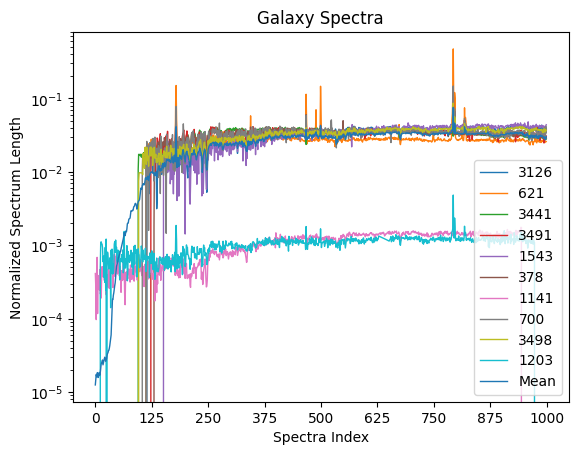

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import ticker
from sklearn.decomposition import PCA

df = pd.read_csv("Problem_Set_6_Spectra.csv", delimiter=" ")
random_indices = random.sample(range(df.shape[0]), 10)
pca = PCA

fig, ax = plt.subplots()
for index in random_indices:
    plt.plot(df.iloc[index], label=index, linewidth=1)

mean_spectra = pca.mean_
plt.plot(mean_spectra, label="Mean", linewidth=1)

plt.yscale("log")
x = np.linspace(0, len(mean_spectra), 9)
ax.set_xticks(x)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.title("Galaxy Spectra")
plt.ylabel("Normalized Spectrum Length")
plt.xlabel("Spectra Index")
plt.legend()
plt.show()

## Problem B

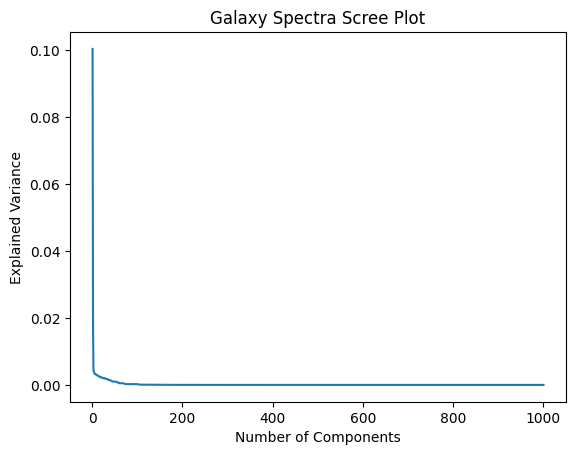

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("Problem_Set_6_Spectra.csv", delimiter=" ")
pca = PCA().fit(df)
eigenvalues = np.arange(pca.n_components_) + 1
plt.plot(eigenvalues, pca.explained_variance_) # or explained variance ratio???
plt.title("Galaxy Spectra Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Eigenvalues")
plt.show()


## Problem C

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import random

def reconstruct(spectra):
    n_all = range(1, 6)
    for n in n_all:
        transformed = pca.transform(spectra.reshape(1, -1))
        transformed[:, n:] = 0
        plt.plot(pca.inverse_transform(transformed)[0], label = f"{n} Eigenvalues", linewidth=1)

df = pd.read_csv("Problem_Set_6_Spectra.csv", delimiter=" ")
pca = PCA().fit(df)
eigenvalues = np.arange(pca.n_components_)

my_spectra = random.choice(eigenvalues)
reconstruct(my_spectra)
plt.plot(my_spectra, label="Original Spectra", linewidth=1)

plt.title("Galaxy Spectra Reconstruction")
plt.xlabel("Number of Components")
plt.ylabel("Spectrum")
plt.legend()
plt.show()


/Users/quinnhelfand/Documents/GitHub/School/ISCI-396/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but PCA is expecting 1000 features as input.

## Problem D

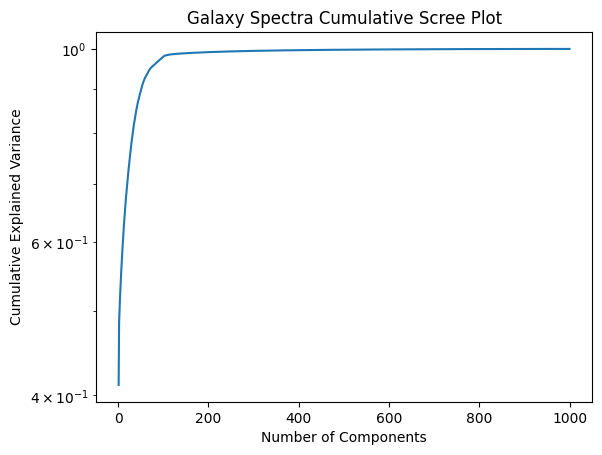

Number of components required to explained 95% of variance: 71


In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv("Problem_Set_6_Spectra.csv", delimiter=" ")
pca = PCA().fit(df)
eigenvalues = np.arange(pca.n_components_) + 1
cumulative_explained_variance = list(np.cumsum(pca.explained_variance_ratio_))
plt.plot(eigenvalues, cumulative_explained_variance) # or explained variance ratio???
plt.title("Galaxy Spectra Cumulative Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.yscale("log")
plt.show()

above_095 = list(filter(lambda x: x > 0.95, cumulative_explained_variance))
print(f"Number of components required to explained 95% of variance: {cumulative_explained_variance.index(above_095[0])}")

## Problem E

In [36]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv("Problem_Set_6_Spectra.csv", delimiter=" ")
pca = PCA().fit(df)
eigenvalues = np.arange(pca.n_components_) + 1
num_nonzero = len(np.nonzero(eigenvalues))
print(f"There are {num_nonzero} nonzero eigenvalues.")
print(f"There are {len(eigenvalues) - num_nonzero} eigenvalues equal to 0.")

There are 1 nonzero eigenvalues.
There are 999 eigenvalues equal to 0.


This indicates that a lot of the galaxy spectra are very similar. The one non-zero value may be an outlier. Added to the fact that only 71 components are needed to explain 95% of the variance, we can know that there is little diversity among spectra and that they share a lot of common features.